# Importing Necessary Libraries

In [1]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import perf_counter
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

C:\Users\user\anaconda3\envs\keras_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\envs\keras_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\envs\keras_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\envs\keras_env\lib\site-packages\tensorf

# Importing Our Dataset

### 1. Our Train Dataset
This consist of 20000 face images with an equal split of 10000 male & 10000 female

In [2]:
female_train_path = 'D:/SC4020 P1 Dataset/Training/female'
male_train_path = 'D:/SC4020 P1 Dataset/Training/male'
train_path = 'D:/SC4020 P1 Dataset/Training/combined'
IMG_SIZE = 32
IMG_COUNT = 10000
IMG_TOTALCOUNT = 2* IMG_COUNT

# Create the training images directory to store all our training images
os.makedirs(train_path, exist_ok=True)

# lists to store data and labels
data_training = []  # To store image data
labels_training = []  # To store corresponding labels

# Importing MALE training data    
dataFolder = os.listdir(male_train_path)
for imageFile in dataFolder[:IMG_COUNT]:
    source_file = os.path.join(male_train_path, imageFile)
    destination_file = os.path.join(train_path, imageFile)
    shutil.copy2(source_file, destination_file)

    # Load the image using OpenCV
    img = cv2.imread(source_file)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32')

    # Append the image data to the data list after converting it to a NumPy array
    data_training.append(img)

    # Append the label to the labels list
    labels_training.append(0)

# Importing FEMALE training data    
dataFolder = os.listdir(female_train_path)
for imageFile in dataFolder[:IMG_COUNT]:
    source_file = os.path.join(female_train_path, imageFile)
    destination_file = os.path.join(train_path, imageFile)
    shutil.copy2(source_file, destination_file)

    # Load the image using OpenCV
    img = cv2.imread(source_file)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32')

    # Append the image data to the data list after converting it to a NumPy array
    data_training.append(img)

    # Append the label to the labels list
    labels_training.append(1)
    
# Convert the data list to a NumPy array
data_training = np.array(data_training)
labels_training = np.array(labels_training)

# Normalize Data
data_training = data_training/255.0   

print("Number of data samples added:", len(data_training))
print("Number of labels added:", len(labels_training))
    
# k-means accept data with less than 3 dimensions
reshaped_data_training = data_training.reshape(len(data_training),-1)
reshaped_data_training.shape

Number of data samples added: 20000
Number of labels added: 20000


(20000, 3072)

### 2. Our Test (Un-masked) Dataset
This consist of 500 face images where none are wearing masks

In [3]:
female_test_unmasked_path = 'D:/SC4020 P1 Dataset/Validation/female'
male_test_unmasked_path = 'D:/SC4020 P1 Dataset/Validation/male'
test_unmasked_path = 'D:/SC4020 P1 Dataset/Validation/combined'
IMG_SIZE = 32
IMG_COUNT = 250
IMG_TOTALCOUNT = 2 * IMG_COUNT

# Create the unmasked test images directory to store all our images
os.makedirs(test_unmasked_path, exist_ok=True)

# lists to store data and labels
data_unmasked_test = []  # To store image data
labels_unmasked = []  # To store corresponding labels

# Importing MALE training data    
dataFolder = os.listdir(male_test_unmasked_path)
for imageFile in dataFolder[:IMG_COUNT]:
    source_file = os.path.join(male_test_unmasked_path, imageFile)
    destination_file = os.path.join(test_unmasked_path, imageFile)
    shutil.copy2(source_file, destination_file)

    # Load the image using OpenCV
    img = cv2.imread(source_file)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32')

    # Append the image data to the data list after converting it to a NumPy array
    data_unmasked_test.append(img)

    # Append the label: male to the labels list
    labels_unmasked.append(0)

# Importing FEMALE training data    
unmaskedTestFolder = os.listdir(female_test_unmasked_path)
for imageFile in unmaskedTestFolder[:IMG_COUNT]:
    source_file = os.path.join(female_test_unmasked_path, imageFile)
    destination_file = os.path.join(test_unmasked_path, imageFile)
    shutil.copy2(source_file, destination_file)

    # Load the image using OpenCV
    img = cv2.imread(source_file)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32')

    # Append the image data to the data list after converting it to a NumPy array
    data_unmasked_test.append(img)

    # Append the label:female to the labels list
    labels_unmasked.append(1)

# Convert the data list to a NumPy array
data_unmasked_test = np.array(data_unmasked_test)
labels_unmasked = np.array(labels_unmasked)

# Normalize Data
data_unmasked_test = data_unmasked_test/255.0
    
print("Number of unmasked test images added:", len(data_unmasked_test))
print("Number of unmasked test labels added:", len(labels_unmasked))

# k-means accept data with less than 3 dimensions
reshaped_unmasked_data_test = data_unmasked_test.reshape(len(data_unmasked_test),-1)
reshaped_unmasked_data_test.shape

Number of unmasked test images added: 500
Number of unmasked test labels added: 500


(500, 3072)

### 3. Our Test (Masked) Dataset
This consist of 500 face images where all are wearing masks

In [4]:
female_test_masked_path = 'D:/SC4020 P1 Dataset/GenderOcclusionData/Validation/female'
male_test_masked_path = 'D:/SC4020 P1 Dataset/GenderOcclusionData/Validation/male'
test_masked_path = 'D:/SC4020 P1 Dataset/GenderOcclusionData/Validation/combined'
IMG_SIZE = 32
IMG_COUNT = 250
IMG_TOTALCOUNT = 2 * IMG_COUNT

# Create the masked test images directory to store all our images
os.makedirs(test_masked_path, exist_ok=True)

# lists to store data and labels
data_masked_test = []  # To store image data
labels_masked = []  # To store corresponding labels

# Importing MALE training data    
dataFolder = os.listdir(male_test_masked_path)
for imageFile in dataFolder[:IMG_COUNT]:
    source_file = os.path.join(male_test_masked_path, imageFile)
    destination_file = os.path.join(test_masked_path, imageFile)
    shutil.copy2(source_file, destination_file)

    # Load the image using OpenCV
    img = cv2.imread(source_file)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32')

    # Append the image data to the data list after converting it to a NumPy array
    data_masked_test.append(img)

    # Append the label: male to the labels list
    labels_masked.append(0)

# Importing FEMALE training data    
maskedTestFolder = os.listdir(female_test_masked_path)
for imageFile in maskedTestFolder[:IMG_COUNT]:
    source_file = os.path.join(female_test_masked_path, imageFile)
    destination_file = os.path.join(test_masked_path, imageFile)
    shutil.copy2(source_file, destination_file)

    # Load the image using OpenCV
    img = cv2.imread(source_file)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32')

    # Append the image data to the data list after converting it to a NumPy array
    data_masked_test.append(img)

    # Append the label:female to the labels list
    labels_masked.append(1)

# Convert the data list to a NumPy array
data_masked_test = np.array(data_masked_test)
labels_masked = np.array(labels_masked)

# Normalize Data
data_masked_test = data_masked_test/255.0
    
print("Number of masked test images added:", len(data_masked_test))
print("Number of masked test labels added:", len(labels_masked))
    
# k-means accept data with less than 3 dimensions
reshaped_masked_data_test = data_masked_test.reshape(len(data_masked_test),-1)
reshaped_masked_data_test.shape

Number of masked test images added: 500
Number of masked test labels added: 500


(500, 3072)

# K-Means Clustering & Modelling

### Visualisation of a 64 clustroid K-Means cluster model

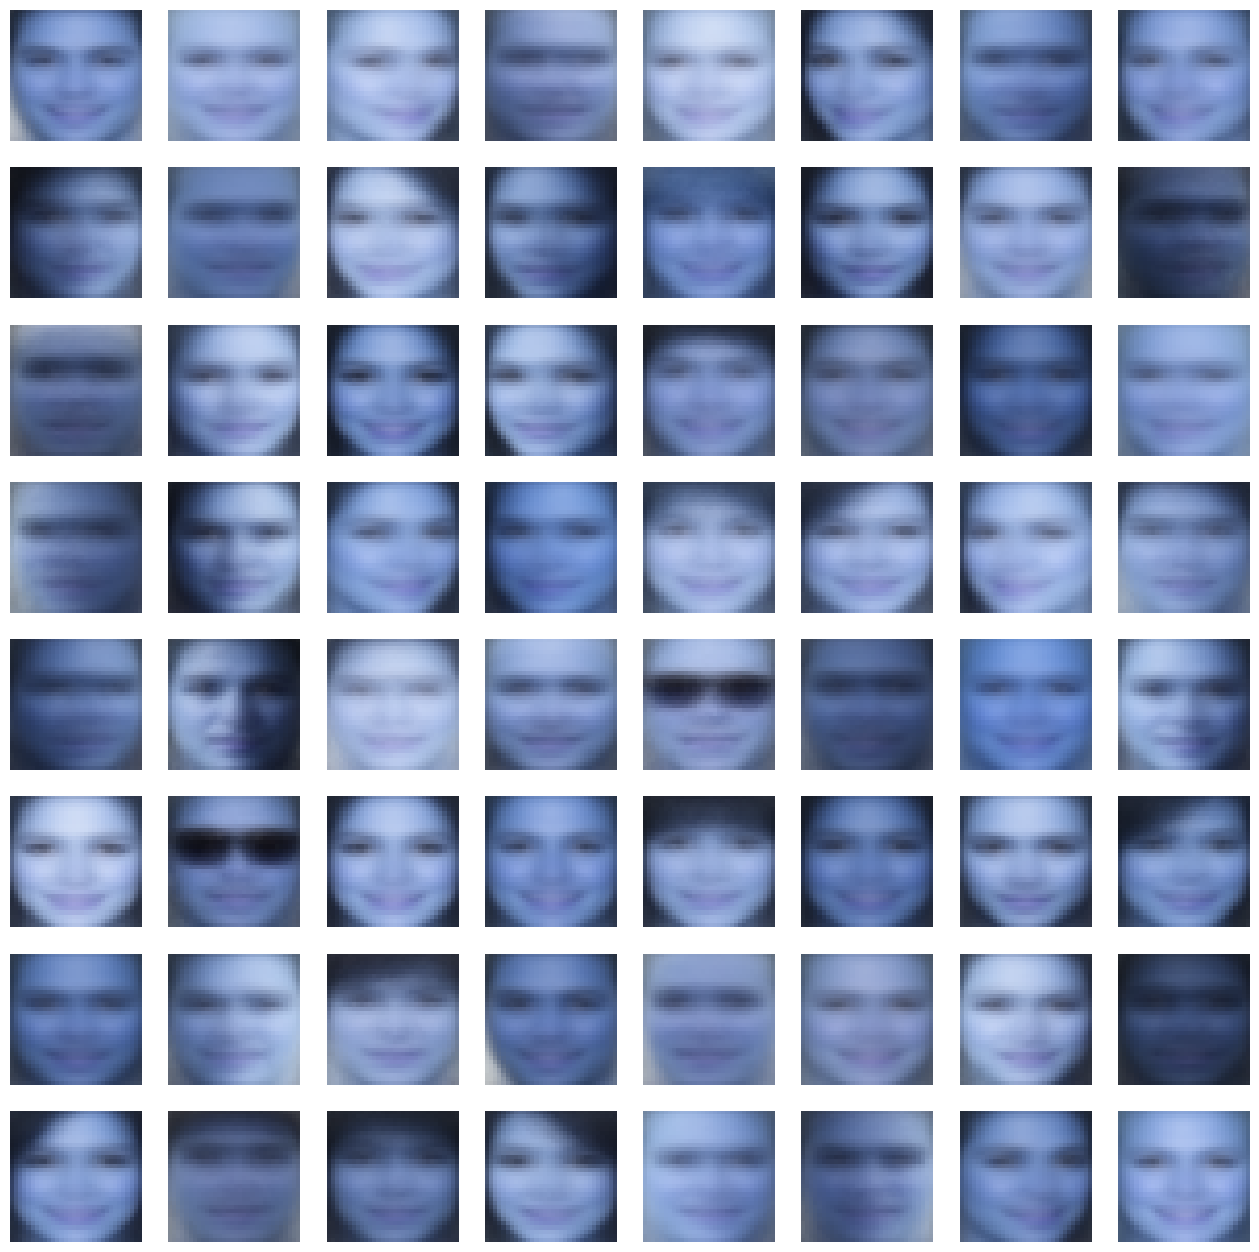

In [5]:
CENTROIDS=64
kmeans = KMeans(n_clusters=CENTROIDS, random_state=0)
clusters = kmeans.fit(reshaped_data_training)
kmeans.cluster_centers_.shape

kmeans.cluster_centers_ = kmeans.cluster_centers_*255
plt.figure(figsize=(16, 16))  # Set the figure size to accommodate all clusters

for i in range(CENTROIDS):
    plt.subplot(8, 8, i + 1)  # Create an 8x8 (64) grid of subplots
    cluster_center_image = kmeans.cluster_centers_[i].astype(int).reshape(32, 32, 3)
    plt.imshow(cluster_center_image)
    plt.axis('off')  # Turn off axis labels and ticks

plt.show()

### Mapping Labels & Centroids

Since K-Means do not have information labels, we will map the points to the real labels. Then map predicted values to its corresponding gender

In [6]:
# mapping labels from prediction_label to original labels
def Map_Prediction_To_MaleAndFemale(prediction_label,data_label):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(prediction_label))):
        
        # Create a binary mask index where elements are set to 1
        # if the corresponding element in prediction_label matches the current cluster label i, 
        # and 0 otherwise.
        binaryMask = np.where(prediction_label == i,1,0)
        
        num = np.bincount(data_label[binaryMask==1]).argmax()
        
        reference_label[i] = num
        
    return reference_label

# Mapping predictions to original labels
def get_labels(prediction_label,reference_labels):
    
    mapped_labels = np.empty(len(prediction_label))
    
    for i in range(len(prediction_label)):
        mapped_labels[i] = reference_labels[prediction_label[i]]
        
    return mapped_labels

# K-Means Prediction (Un-masked)

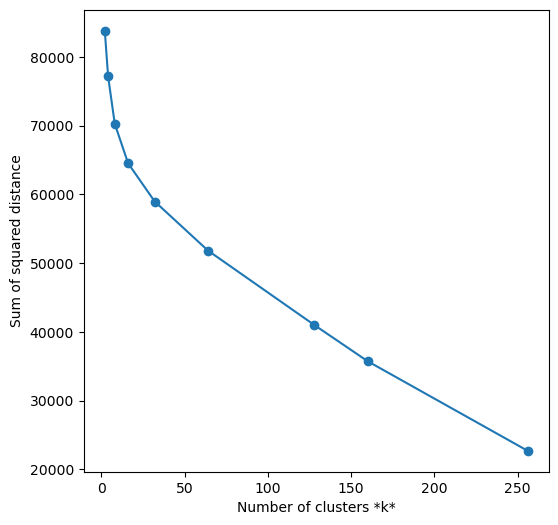

In [7]:
# elbow method
# squared distance
sse_unmasked = []
accuracy_score_unmasked = []
list_k = [2,4,8,16,32,64,128,160,256]

for k in list_k:
    km = KMeans(n_clusters=k, init='k-means++')
    prediction_unmasked = km.fit_predict(reshaped_masked_data_test)
    sse_unmasked.append(km.inertia_)
    
    reference_labels = Map_Prediction_To_MaleAndFemale(prediction_unmasked,labels_unmasked)

    predicted_labels = get_labels(prediction_unmasked,reference_labels)
    
#     print(f"Accuracy for k = {k}: ", accuracy_score(predicted_labels,labels_unmasked))
    accuracy_score_unmasked.append(accuracy_score(predicted_labels,labels_unmasked))

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse_unmasked, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

# K-Means Prediction (Masked)

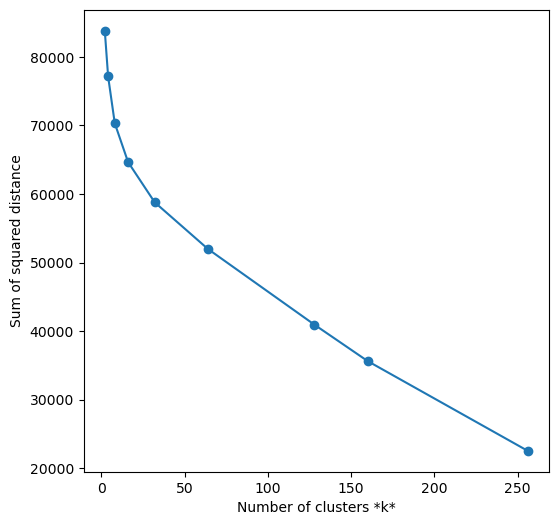

In [8]:
# elbow method
# squared distance
sse_masked = []
accuracy_score_masked=[]
list_k = [2,4,8,16,32,64,128,160,256]

for k in list_k:
    km = KMeans(n_clusters=k, init='k-means++')
    prediction_masked = km.fit_predict(reshaped_masked_data_test)
    sse_masked.append(km.inertia_)
    
    reference_labels = Map_Prediction_To_MaleAndFemale(prediction_masked,labels_masked)

    predicted_labels = get_labels(prediction_masked,reference_labels)
    
#     print(f"Accuracy for k = {k}: ", accuracy_score(predicted_labels,labels_masked))
    accuracy_score_masked.append(accuracy_score(predicted_labels,labels_masked))

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse_masked, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

# Mask vs Unmasked Result Comparisons

### Accuracy of Mask vs Unmasked for various clusters (K)

In [9]:
accuracy_percentage_unmasked = [f'{round(score * 100, 1)}%' for score in accuracy_score_unmasked]
accuracy_percentage_masked = [f'{round(score * 100, 1)}%' for score in accuracy_score_masked]

Accuracy_Comparison_Data = {
    'K': list_k,
    'Accuracy (Unmasked)': accuracy_percentage_unmasked,
    'Accuracy (Masked).': accuracy_percentage_masked
}

Accuracy_Comparison_Results = pd.DataFrame(Accuracy_Comparison_Data)
Display_Accuracy_Comparison_Results = Accuracy_Comparison_Results.to_string(index=False)
print(Display_Accuracy_Comparison_Results)

  K Accuracy (Unmasked) Accuracy (Masked).
  2               56.8%              56.8%
  4               56.0%              56.0%
  8               57.2%              58.6%
 16               60.2%              60.4%
 32               63.4%              61.8%
 64               71.0%              68.2%
128               73.0%              75.6%
160               74.8%              75.6%
256               84.8%              83.4%


### Unmasked Analysis - Accuracy, Squared Dist (Elbow Method)

In [10]:
sse_rounded_unmasked = [round(sse_value) for sse_value in sse_unmasked]

Unmasked_Prediction_Data = {
    'K': list_k,
    'Accuracy': accuracy_percentage_unmasked,
    'Squared Dist.': sse_rounded_unmasked
}

Unmasked_Prediction_Results = pd.DataFrame(Unmasked_Prediction_Data)

Display_Unmasked_Prediction_Results = Unmasked_Prediction_Results.to_string(index=False)
print(Display_Unmasked_Prediction_Results)

  K Accuracy  Squared Dist.
  2    56.8%          83807
  4    56.0%          77150
  8    57.2%          70263
 16    60.2%          64529
 32    63.4%          58963
 64    71.0%          51826
128    73.0%          40981
160    74.8%          35720
256    84.8%          22709


### Masked Analysis - Accuracy, Squared Dist (Elbow Method)

In [11]:
sse_rounded_masked = [round(sse_value) for sse_value in sse_masked]

Masked_Prediction_Data = {
    'K': list_k,
    'Accuracy': accuracy_percentage_masked,
    'Squared Dist.': sse_rounded_masked
}

Masked_Prediction_Results = pd.DataFrame(Masked_Prediction_Data)

Display_Masked_Prediction_Data = Masked_Prediction_Results.to_string(index=False)
print(Display_Masked_Prediction_Data)

  K Accuracy  Squared Dist.
  2    56.8%          83807
  4    56.0%          77140
  8    58.6%          70310
 16    60.4%          64648
 32    61.8%          58783
 64    68.2%          51976
128    75.6%          40935
160    75.6%          35627
256    83.4%          22562
